In [1]:
import pandas as pd

In [2]:
life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [3]:
# Accessing elements and slicing
print(life_expectancy[0])
print(gdp[3:6])

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [4]:
# Looping
for country_life_expectancy in life_expectancy:
    print('Examining life expectancy {}'.format(country_life_expectancy))

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


In [5]:
# Pandas functions
print(life_expectancy.mean())
print(life_expectancy.std())
print(gdp.max())
print(gdp.sum())

72.86999999999999
6.213999474869968
27036.48733192
182957.59832967006


In [6]:
# Vectorized operations and index arrays
a = pd.Series([1, 2, 3, 4])
b = pd.Series([1, 2, 1, 2])

print(a + b)
print(a * 2)
print(a >= 3)
print(a[a >= 3])

0    2
1    4
2    4
3    6
dtype: int64
0    2
1    4
2    6
3    8
dtype: int64
0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


In [12]:
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    num_same_direction = 0
    num_different_direction = 0

    variable1_index_array = variable1 < variable1.mean()
    variable2_index_array = variable2 < variable2.mean()

    for i in range(len(variable1)):
        if variable1_index_array[i] == variable2_index_array[i]:
            num_same_direction += 1
        else:
            num_different_direction += 1
    
    return (num_same_direction, num_different_direction)

variable_correlation(pd.Series([1, 2, 3, 4]), pd.Series([7, 6, 5, 4]))

(0, 4)

Time to work with indexes. Pandas series (and dataframes) has the advantage of label its indexes.

In [18]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries. Index list must be the same lenght as Pandas series
employment = pd.Series(employment_values, index=countries)

# Help on idxmax() pandas series method
#help(pd.Series.idxmax)

def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas idxmax() function. Documention can
    be found here:
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html
    '''
    max_country = employment.idxmax()  # Returns the label index of the max value in the series
    max_value = employment.max()

    return (max_country, max_value)

max_employment(employment)

('Angola', 75.69999695)

## label index
When adding up two or more pandas series with the same index label, the resulting series is the addition of values within the same index label.

In [23]:
# Addition when indexes are the same
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(s1 + s2)

a    11
b    22
c    33
d    44
dtype: int64


This is the same as the addition of series with no index label.

In [24]:
s1 = pd.Series([1, 2, 3, 4])
s2 = pd.Series([10, 20, 30, 40])
print(s1 + s2)

0    11
1    22
2    33
3    44
dtype: int64


When adding up two pandas series with some uncommon index label, the series result is Nan values for those uncommon index label. Pandas tries to match series elements by index label in order to operato on them, when no match, NaN is returned, like joining in SQL.

In [28]:
# Addition when indexes are different
# Indexes overlap, but do not have exactly the same elements
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
print(s1 + s2)
print((s1 + s2).isna())  # Returns True for NaN values
print((s1 + s2).notna()) # Returns True for non NaN values

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64
a     True
b     True
c    False
d    False
e     True
f     True
dtype: bool
a    False
b    False
c     True
d     True
e    False
f    False
dtype: bool


In [26]:
# Indexes do not overlap
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
print(s1 + s2)

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


In [21]:
# When adding up pandas series with named indexes, pandas adds up by index name, independently 
# of the order 
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
print(s1 + s2)

a    31
b    12
c    43
d    24
dtype: int64


In [35]:
import math

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])

s3 = s1 + s2
print(s3)

# Iterate over the items in summed up series and check for NaN values, replacing NaN values with 
# values from the original series.
for i, e in s3.items():
    if pd.isna(e):
        if i in s1.index:
            s3[i] = s1[i]
        else: s3[i] = s2[i]

s3

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64

In [65]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print(s1.loc['c'])
print(s1.iloc[2])

3
3


## Pandas Series apply()

In [40]:
# Example pandas apply() usage (although this could have been done
# without apply() using vectorized operations)
if False:
    s = pd.Series([1, 2, 3, 4, 5])
    def add_one(x):
        return x + 1
    print(s.apply(add_one))

names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    reversed_names_series = names.apply(lambda x: ', '.join(x.split()[::-1]))
    return reversed_names_series

reverse_names(names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

### Plotting in Pandas

In [2]:
import seaborn as sns

In [3]:
path = './Datasets/'
employment = pd.read_csv(path + 'aged_15plus_employment_rate_percent.csv', index_col='country')
female_completion = pd.read_csv(path + 'primary_school_completion_percent_of_girls.csv', index_col='country')
male_completion = pd.read_csv(path + 'primary_school_completion_percent_of_boys.csv', index_col='country')
life_expectancy = pd.read_csv(path + 'lex.csv', index_col='country')
gdp = pd.read_csv(path + 'gdppercapita_us_inflation_adjusted.csv', index_col='country')

In [107]:
employment

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,42.5,42.5,42.5,42.5,42.4,42.4,42.3,42.2,42.2,42.2,...,42.3,42.4,42.5,42.7,42.9,43.0,43.2,43.4,43.5,41.5
Angola,75.0,75.0,75.2,75.1,74.9,74.9,74.8,74.7,74.6,74.5,...,71.7,71.8,71.8,71.9,71.9,72.0,72.1,72.1,72.1,69.6
Albania,57.8,58.2,56.8,55.7,54.1,53.3,54.5,53.8,52.7,52.1,...,52.0,49.4,44.7,43.7,46.0,47.9,49.3,52.0,53.4,52.7
UAE,71.8,72.2,72.9,73.4,73.8,73.3,73.1,73.3,73.7,74.3,...,81.7,81.5,81.3,81.3,81.6,81.2,80.3,80.3,80.2,76.9
Argentina,57.3,56.9,54.9,54.0,49.5,50.7,52.5,54.1,53.1,52.6,...,56.3,56.1,56.0,55.4,55.5,55.5,55.5,55.7,55.5,49.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,44.4,44.6,44.5,44.7,44.2,44.0,44.2,44.1,44.0,43.6,...,41.4,40.4,40.6,40.7,40.6,40.3,40.3,40.4,40.1,39.2
Yemen,40.5,40.8,41.1,41.3,41.5,41.5,41.6,41.5,41.5,40.6,...,33.6,32.9,32.4,31.9,32.3,32.6,32.9,33.2,33.4,33.0
South Africa,39.9,39.8,39.6,39.4,39.3,39.2,39.1,39.0,38.9,38.8,...,39.6,39.9,40.5,40.6,41.5,40.8,41.0,40.9,40.1,36.7


In [44]:
employment_data = employment.loc['Colombia']
employment_data = employment_data.loc[employment_data.index > '1990'].loc[employment_data.index <= '2000']
employment_data.rename('Employment rate', inplace=True)

1991    60.0
1992    60.7
1993    62.0
1994    62.0
1995    62.0
1996    59.9
1997    59.8
1998    57.8
1999    54.1
2000    53.9
Name: Employment rate, dtype: float64

In [33]:
female_data = female_completion.loc['Colombia']
female_data = female_data.loc[female_data.index > '1990']
female_data = female_data.loc[female_data.index <= '2000']
female_data.rename('Primary school female completion rate', inplace=True)

1991     79.1
1992     91.0
1993     88.8
1994     87.1
1995     90.9
1996     91.8
1997      NaN
1998     97.3
1999     98.9
2000    102.0
Name: Primary school female completion rate, dtype: float64

In [34]:
male_data = male_completion.loc['Colombia']
male_data = male_data[male_data.index > '1990']
male_data = male_data[male_data.index <= '2000']
male_data.rename('Primary school male completion rate', inplace=True)

1991    72.4
1992    77.9
1993    81.5
1994    82.6
1995    86.2
1996    87.5
1997     NaN
1998    93.0
1999    94.3
2000    98.8
Name: Primary school male completion rate, dtype: float64

Combien the previous three pd Series into a Dataset to plot its data and how ir correlates.

In [35]:
# Creating Pandas dataframe from pandas series in order to use as data source in sns lineplot function
# join the series into a dataframe
df = pd.concat([employment_data, female_data, male_data], axis=1, ignore_index=False)
df

,Employment rate,Primary school female completion rate,Primary school male completion rate
1991,60.0,79.1,72.4
1992,60.7,91.0,77.9
1993,62.0,88.8,81.5
1994,62.0,87.1,82.6
1995,62.0,90.9,86.2
1996,59.9,91.8,87.5
1997,59.8,NaN,NaN
1998,57.8,97.3,93.0
1999,54.1,98.9,94.3
2000,53.9,102.0,98.8


<Axes: xlabel='None', ylabel='Primary school male completion rate'>

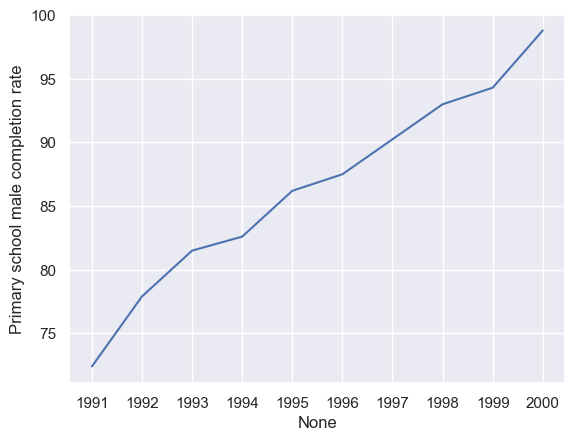

In [40]:
# Use the Series defined above to create a plot of each variable over time for
# the country of your choice.
sns.set_theme(style='darkgrid')

df.index.values
df.index
sns.lineplot(x=df.index, y='Primary school male completion rate', data=df)

<Axes: xlabel='None', ylabel='Primary school female completion rate'>

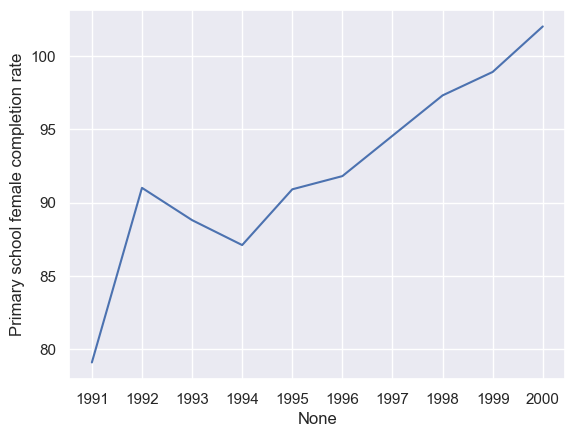

In [41]:
sns.lineplot(x=df.index, y='Primary school female completion rate', data=df)